In [15]:
#WEAK 1 DATA PREPROCESSING AND VISUALIZATION
import pandas as pd
df = pd.read_csv('air_polution.csv')
display(df.head())
display(df.info())

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Patna,"DRM Office Danapur, Patna - BSPCB",07-01-2025 17:00:00,25.586562,85.043586,OZONE,4.0,16.0,11.0
1,India,Chhattisgarh,Kunjemura,"OP Jindal School, Kunjemura - CECB",07-01-2025 17:00:00,22.126650,83.483212,OZONE,3.0,4.0,3.0
2,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",07-01-2025 17:00:00,27.103358,93.679645,OZONE,3.0,3.0,3.0
3,India,Assam,Guwahati,"LGBI Airport, Guwahati - PCBA",07-01-2025 17:00:00,26.108870,91.589544,OZONE,16.0,22.0,19.0
4,India,Chhattisgarh,Bhilai,"32Bungalows, Bhilai - CECB",07-01-2025 17:00:00,21.194815,81.314770,OZONE,1.0,77.0,65.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        503 non-null    object 
 1   state          503 non-null    object 
 2   city           503 non-null    object 
 3   station        503 non-null    object 
 4   last_update    503 non-null    object 
 5   latitude       503 non-null    float64
 6   longitude      503 non-null    float64
 7   pollutant_id   503 non-null    object 
 8   pollutant_min  500 non-null    float64
 9   pollutant_max  500 non-null    float64
 10  pollutant_avg  500 non-null    float64
dtypes: float64(5), object(6)
memory usage: 43.4+ KB


None

In [5]:
display(df.describe(include='all'))

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
count,503,503,503,503,503,503.000000,503.000000,503,500.000000,500.000000,500.000000
unique,1,30,260,503,1,NaN,NaN,4,NaN,NaN,NaN
top,India,Maharashtra,Delhi,"Victoria, Kolkata - WBPCB",07-01-2025 17:00:00,NaN,NaN,OZONE,NaN,NaN,NaN
freq,503,88,38,1,503,NaN,NaN,472,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,22.134027,78.662043,NaN,14.610000,56.116000,40.196000
std,NaN,NaN,NaN,NaN,NaN,5.607419,4.873129,NaN,14.876172,45.968127,32.597773
min,NaN,NaN,NaN,NaN,NaN,8.514909,70.909168,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,18.650506,75.455450,NaN,5.000000,22.000000,18.000000
50%,NaN,NaN,NaN,NaN,NaN,23.002657,77.393848,NaN,11.000000,46.000000,34.000000
75%,NaN,NaN,NaN,NaN,NaN,26.795166,80.630666,NaN,20.000000,77.000000,54.250000


In [6]:
missing_values = df.isnull().sum()
display("Missing values per column:")
display(missing_values)

'Missing values per column:'

,0
country,0
state,0
city,0
station,0
last_update,0
latitude,0
longitude,0
pollutant_id,0
pollutant_min,3
pollutant_max,3


In [46]:
for col in ['pollutant_min', 'pollutant_max', 'pollutant_avg']:
  df[col] = df[col].fillna(df[col].mean())

In [8]:
missing_values_after_fill = df.isnull().sum()
display("Missing values per column after filling:")
display(missing_values_after_fill)

'Missing values per column after filling:'

,0
country,0
state,0
city,0
station,0
last_update,0
latitude,0
longitude,0
pollutant_id,0
pollutant_min,0
pollutant_max,0


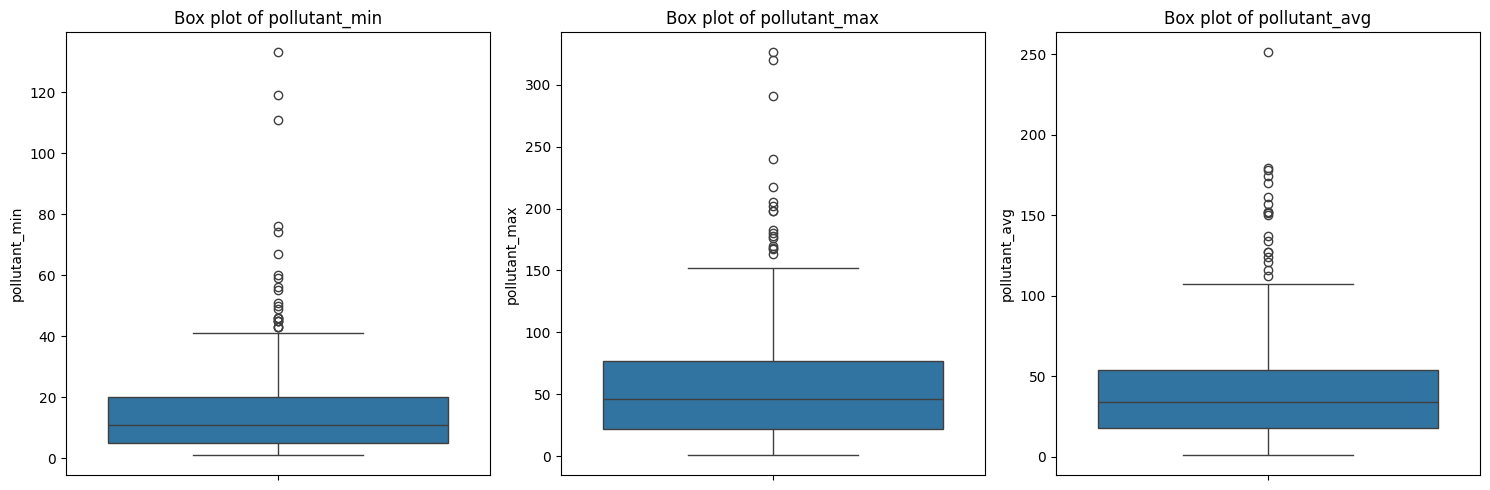

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

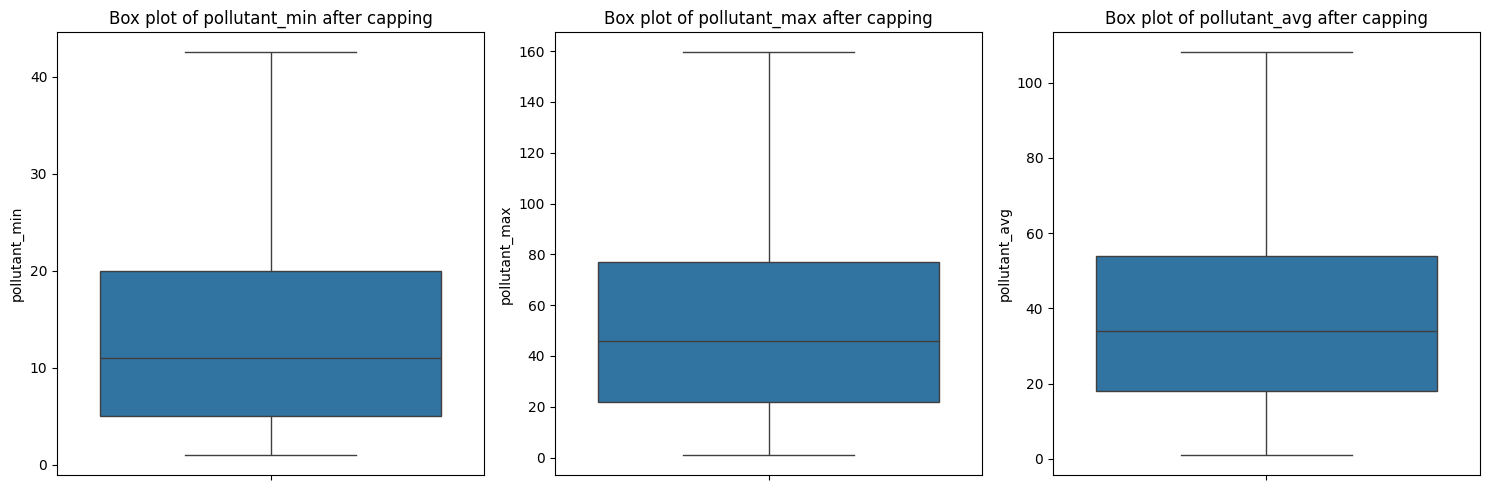

In [10]:
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].clip(upper=upper_bound)

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col} after capping')
plt.tight_layout()
plt.show()

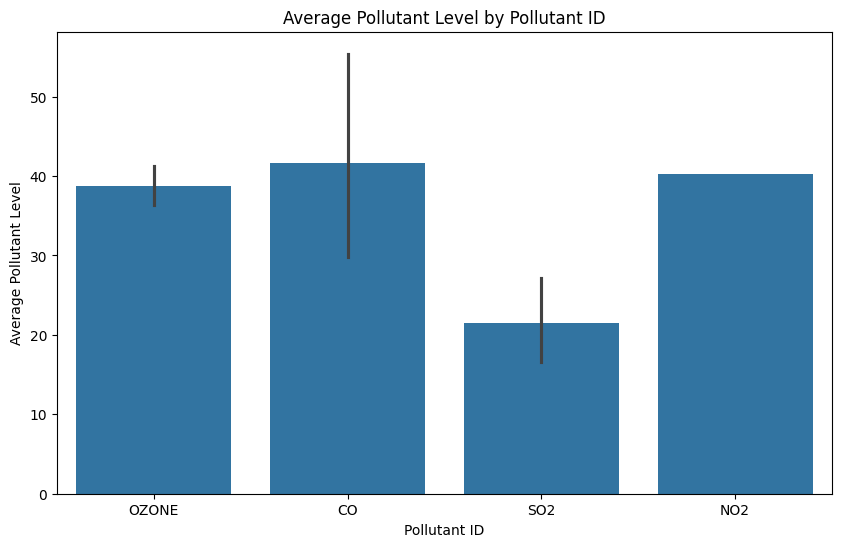

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='pollutant_id', y='pollutant_avg', data=df)
plt.title('Average Pollutant Level by Pollutant ID')
plt.xlabel('Pollutant ID')
plt.ylabel('Average Pollutant Level')
plt.show()

In [12]:
# WEAK 2 MODEL IMPLEMENTATION AND EVALUATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, f1_score, classification_report, confusion_matrix
)

In [18]:
# Load Dataset
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (503, 11)
Columns: Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')


In [47]:
# Choose Target Column
target_col = "latitude"
y = df[target_col]

In [48]:
# Problem Type Detection
unique_vals = y.dropna().unique()
n_unique = len(unique_vals)
is_integer = pd.api.types.is_integer_dtype(y) or np.all(np.mod(y.dropna(),1)==0)

if n_unique <= 20 and is_integer:
    problem_type = "classification"
else:
    problem_type = "regression"

print("Problem type:", problem_type)

Problem type: regression


In [49]:
# Feature Selection
X = df.drop(columns=[target_col])
num_X = X.select_dtypes(include=[np.number])
num_X = num_X.fillna(num_X.median())
print("Numeric features used:", num_X.columns.tolist())

Numeric features used: ['longitude', 'pollutant_min', 'pollutant_max', 'pollutant_avg']


In [50]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    num_X, y, test_size=0.2, random_state=42
)

In [51]:
# Train & Evaluate Models
results = {}
best_model = None
best_score = -np.inf

if problem_type == "regression":
    models = {
        "LinearRegression": Pipeline([("scaler", StandardScaler()), ("lr", LinearRegression())]),
        "RandomForestRegressor": RandomForestRegressor(random_state=42, n_jobs=-1),
        "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)
    }

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        rmse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)
        results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
        if r2 > best_score:
            best_score = r2
            best_model = model

elif problem_type == "classification":
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)

    models = {
        "LogisticRegression": Pipeline([("scaler", StandardScaler()), ("lr", LogisticRegression(max_iter=1000))]),
        "RandomForestClassifier": RandomForestClassifier(random_state=42, n_jobs=-1),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42)
    }

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train_enc)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test_enc, preds)
        f1 = f1_score(y_test_enc, preds, average="weighted")
        results[name] = {"Accuracy": acc, "F1_weighted": f1}
        if acc > best_score:
            best_score = acc
            best_model = model


Training LinearRegression...

Training RandomForestRegressor...

Training GradientBoostingRegressor...


In [52]:
# Show Results
print("\nModel Evaluation Results:")
for model, metrics in results.items():
    print(model, metrics)

print("\nBest model:", type(best_model).__name__)
print("Best score:", best_score)



Model Evaluation Results:
LinearRegression {'MAE': 5.293969054285974, 'RMSE': 37.88077196876292, 'R2': -0.02534159773020561}
RandomForestRegressor {'MAE': 4.1373200763217834, 'RMSE': 28.013611008498625, 'R2': 0.241738772025757}
GradientBoostingRegressor {'MAE': 4.092567085409582, 'RMSE': 26.349836505541028, 'R2': 0.2867731553939752}

Best model: GradientBoostingRegressor
Best score: 0.2867731553939752


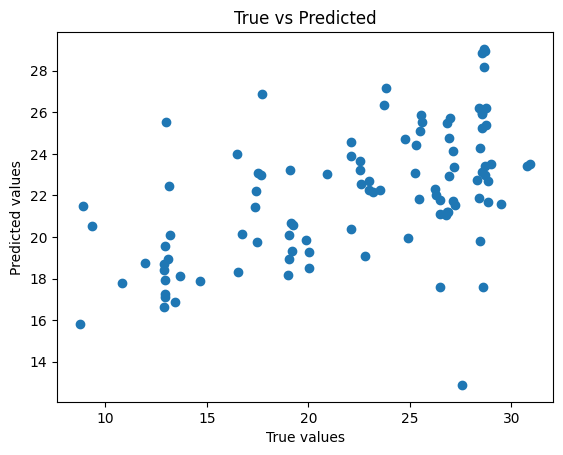

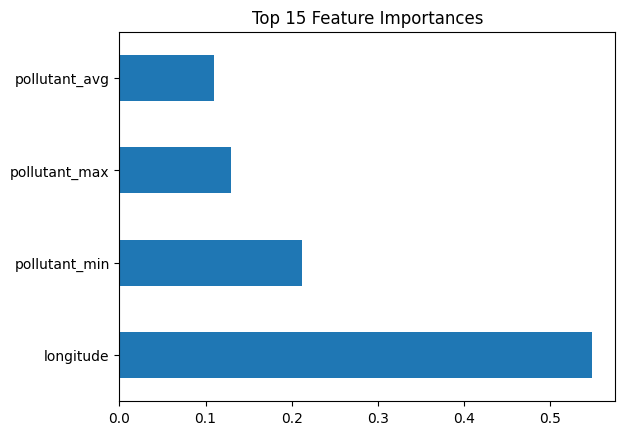

In [53]:
# Plot and Reports
if problem_type == "regression":
    preds = best_model.predict(X_test)
    plt.scatter(y_test, preds)
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.title("True vs Predicted")
    plt.show()

    if hasattr(best_model, "feature_importances_"):
        importances = best_model.feature_importances_
        feat_imp = pd.Series(importances, index=num_X.columns).sort_values(ascending=False)
        feat_imp.head(15).plot(kind="barh")
        plt.title("Top 15 Feature Importances")
        plt.show()

elif problem_type == "classification":
    preds = best_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test_enc, preds))
    cm = confusion_matrix(y_test_enc, preds)
    print("Confusion Matrix:\n", cm)
    plt.imshow(cm, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.colorbar()
    plt.show()

In [54]:
# Save Best Model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("Best model saved as best_model.pkl")

Best model saved as best_model.pkl
